# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
def outlier_removal(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]
    return df_new

In [3]:
data = pd.read_csv("Credit_Risk.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
Imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
Imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
Imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [7]:
data.loc[:, ["LoanAmount"]] = Imp_mean.fit_transform(data.loc[:, ["LoanAmount"]])

In [8]:
data.loc[:, ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History"]] = Imp_mode.fit_transform(data.loc[:, ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History"]])

In [9]:
data.iloc[:, 9:10] = Imp_median.fit_transform(data.iloc[:, 9:10])

In [10]:
data = outlier_removal(data)

C:\Users\maxst\AppData\Local\Temp\ipykernel_8348\804245840.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [11]:
data.shape

(396, 13)

# Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

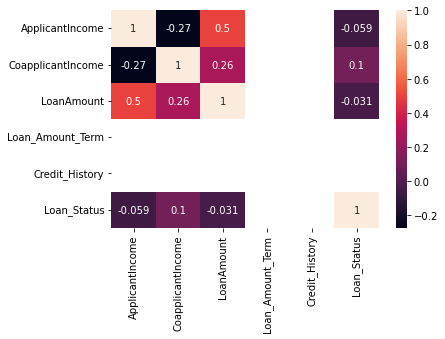

In [13]:
sns.heatmap(data.corr(), annot=True)
plt.show()

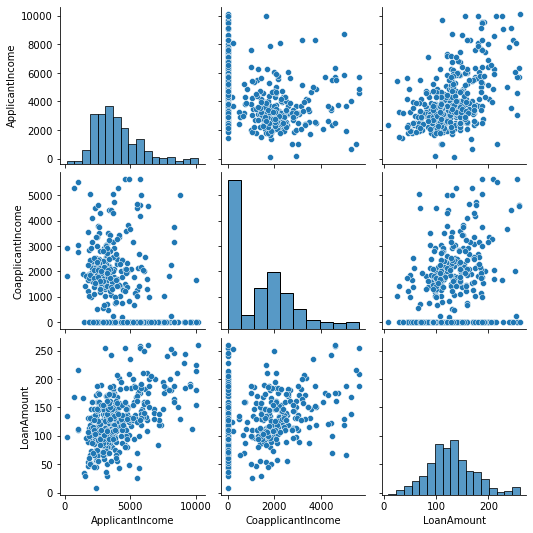

In [14]:
sns.pairplot(data, x_vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], y_vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"])

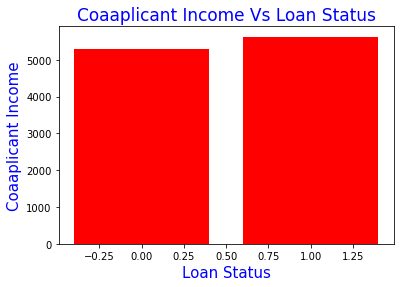

In [15]:
plt.bar(data["Loan_Status"], data["CoapplicantIncome"], color = "red")
plt.ylabel("Coaaplicant Income", color = "blue", size = 15)
plt.xlabel("Loan Status", color = "blue", size = 15)
plt.title("Coaaplicant Income Vs Loan Status", color = "blue", size = 17)
plt.show()

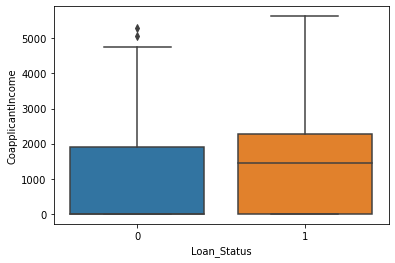

In [16]:
sns.boxplot(x = data["Loan_Status"], y = data["CoapplicantIncome"])
plt.show()